# An Overview of Random Forest (RF) Algorithm

## Main Idea:
- Random Forest (RF) algorithm is a popular supervised ensemble machine learning (ML) algorithm that can handle both regression and classification tasks.

- It builds multiple decision trees and combines their predictions to improve accuracy and prevent overfitting.

- Instead of relying on a single decision tree, Random Forest aggregates the results of many trees to make robust predictions.

## Advantages of RF:
- Resistant to overfitting due to averaging.
- Handles missing data and outliers effectively.
- Provides feature importance, helping to identify which variables are most impactful.

## Applications:
- Used in various fields such as healthcare, finance, and automotive for tasks like classification, fraud detection, and fault diagnosis.


For more about the Random Forest algorithm, see here.

https://en.wikipedia.org/wiki/Random_forest <br>
https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

--------------------
# How Random Forest Classification Works?

1. **Data Sampling:** the algorithm selects multiple random subsets of the dataset (with replacement) to create *bootstrapped* samples.

2. **Building Trees:** for each subset, a decision tree is trained. At each split, only a random subset of features is considered to increase diversity.

3. **Prediction:** each decision tree predicts a class for the input data.

4. **Voting:** the final prediction is made based on majority voting across all trees (for classification) or averaging (for regression).

![Random Forest Classifier](https://aiml.com/wp-content/uploads/2023/03/random-forest-classifier-3.png)

**Why Random Forests Work Well?** By combining diverse trees, Random Forest reduces the variance and bias of the predictions, achieving high accuracy and generalization.

--------------------------
# Building our Random Forest (RF) Classifier

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

- We'll use the `Car Evaluation` dataset, which is a well-structured dataset often used for machine learning classification tasks.

- It contains information about cars categorized by their acceptability based on a variety of attributes.

- These attributes include buying price, maintenance cost, number of doors, capacity in terms of passengers, trunk size, and safety ratings.

- The target variable classifies each car as "unacceptable," "acceptable," "good," or "very good."

- The dataset was originally derived from a decision model and is widely used in education and research for experimenting, because of its straightforward structure and categorical features.

For more details, you can explore the dataset here - https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [292]:
%matplotlib inline
import os

# Print current working directory
os.getcwd()

'/content'

In [293]:
data = 'car_evaluation.csv'
df = pd.read_csv(data, header=None)

df.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [294]:
df.shape

(1728, 7)

In [295]:
# Change column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [296]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [297]:
for col in col_names:
    print(df[col].value_counts(), end='\n\n')

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

safety
low     576
med     576
high    576
Name: count, dtype: int64

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



In [298]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


-----------------------
# Pre-Processing our dataset

- Tree-based models, like Random Forest, are *inherently robust to outliers* and do not require features to be normalized, unlike linear models.

- As a result, minimal pre-processing is needed. For this dataset, the primary step involves converting categorical features into ordinal values to make them compatible with the model.

In [299]:
# Check for missing values
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [300]:
# Split the data into features (X) and target (y)
X = df.drop(['class'], axis=1)
y = df['class']

In [301]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [302]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


In [303]:
!pip install category_encoders

In [304]:
# find the columns names
cols = [col for col in X_train.columns]
cols

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [305]:
import category_encoders as ce

# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [306]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [307]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


----------------------------
# Fitting our Random Forest (RF) Model

- Fitting a Random Forest model involves training an ensemble of decision trees on the provided dataset to make predictions.

In [308]:
# Let's import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
n_estimators = 100  # the number of decision trees in the forest
rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=None, random_state=42)

# fit the model to our training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Visualizing the Results

In [309]:
# For Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz

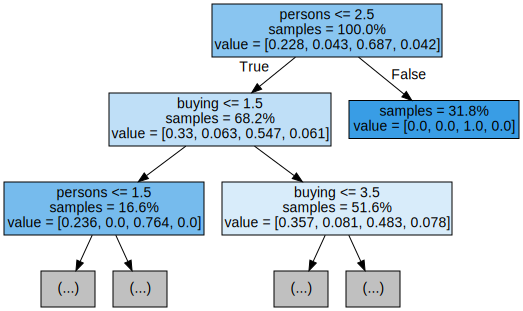

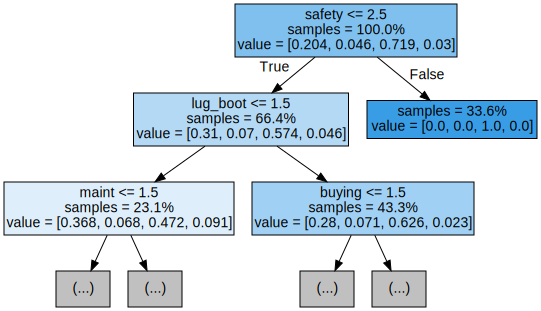

In [310]:
# Export the first two decision trees from the forest
n_dt = 2
for i in range(n_dt):
    tree = rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)

    graph = graphviz.Source(dot_data)
    display(graph)

-------------------------
# Evaluating our Random Forest (RF) Model

- After training, we will test the model on the unseen data (i.e., the test set) to check its `accuracy`, `precision`, `recall`, or other metrics.

In [311]:
# Predict on the test set
y_pred = rfc.predict(X_test)

## 1) Accuracy Metric

In [312]:
# Check the accuracy score
from sklearn.metrics import accuracy_score

print(f"RF Model accuracy score with {n_estimators} decision-trees: {accuracy_score(y_test, y_pred):.4f}")

RF Model accuracy score with 100 decision-trees: 0.9566


## 2) Confusion Matrix
- Let's display the confusion matrix to summarize the performance of out Random Forest classification algorithm.

**Note:**
A confusion matrix gives us a clear picture of our classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

In [313]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 72,   7,   4,   0],
       [  0,  10,   0,   1],
       [  0,   0, 235,   0],
       [  2,   1,   0,  14]])

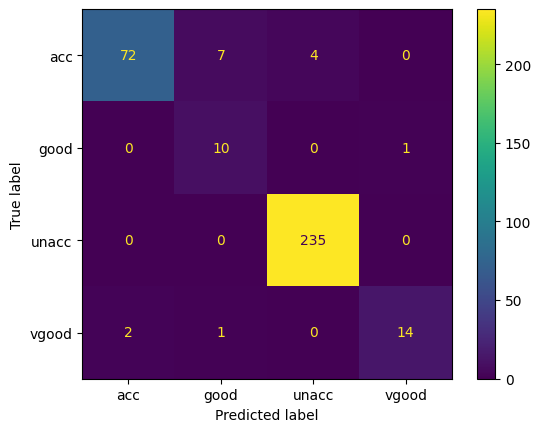

In [314]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_).plot()

## 3) Classification Report

- Classification report is another way to evaluate the classification model performance, it displays the precision, recall, f1 and support scores for the model.

In [315]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=rfc.classes_))

              precision    recall  f1-score   support

         acc       0.97      0.87      0.92        83
        good       0.56      0.91      0.69        11
       unacc       0.98      1.00      0.99       235
       vgood       0.93      0.82      0.88        17

    accuracy                           0.96       346
   macro avg       0.86      0.90      0.87       346
weighted avg       0.96      0.96      0.96       346



-------------------------------
# Enhacing Model Accuracy

## **Method 1:** Using RandomizedSearchCV to find the best hyperparamter (i.e., Hyperparamter tuning)

- `RandomizedSearchCV` performs hyperparameter tuning by training multiple models (n_iter_ iterations), using accuracy as the default scoring metric.

- It employs 5-fold cross-validation, where the data is split into 5 groups: 4 groups are used for training, and 1 for testing in each iteration.

- The process is repeated for all splits, and the accuracy scores are averaged to identify the best model.

In [316]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint  # Uniform distribution

In [317]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rfc = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rfc,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f68cd751540>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f68d7002560>})

In [318]:
# Print the best hyperparameters
print(f"Best found hyperparameters: {rand_search.best_params_}")

Best found hyperparameters: {'max_depth': 18, 'n_estimators': 209}


In [319]:
# Create a variable for the best RF model
best_rf = rand_search.best_estimator_

# Use the best RF model to make predictions
y_pred = best_rf.predict(X_test)

In [320]:
# Check the accuracy score of the found best model
print(f"RF Model accuracy score with {rand_search.best_params_['n_estimators']} decision-trees: {accuracy_score(y_test, y_pred):.4f}")

RF Model accuracy score with 209 decision-trees: 0.9653


------------------------------------
## **Method 2:** Using feature importance scores to enhance our model accuracy

- To improve the accuracy of our model, we can leverage the feature importance scores provided by the Random Forest algorithm.

- By identifying and selecting the most significant features, we can reduce noise and focus on the variables that contribute most to the predictions.

- Once the key features are determined, we can train a new Random Forest model using only these selected features.

- This approach often improves accuracy by simplifying the model, reducing overfitting, and enhancing generalization.

- Additionally, this process can provide insights into the data by highlighting which features have the greatest impact on predictions.

In [321]:
# instantiate the classifier
n_estimators = 100  # the number of decision trees in the forest
clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [322]:
# view the feature importance scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
safety,0.285096
persons,0.228127
buying,0.167869
maint,0.158078
lug_boot,0.093353
doors,0.067478


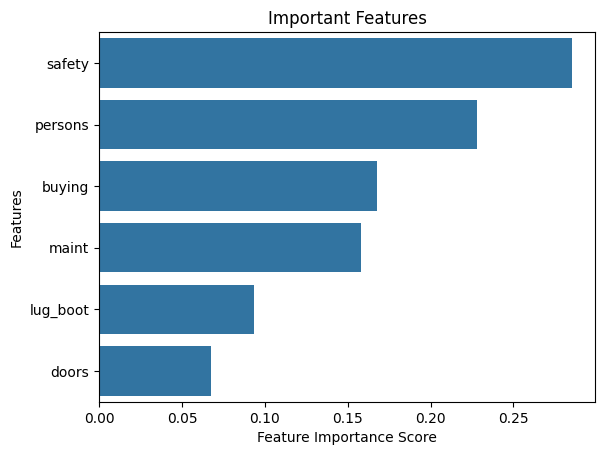

In [323]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

We can see that the most important feature is `safety` and least important ones are `doors` and `lug_boot`, therefore, we remove/drop them.

Let's Build our Random Forest (RF) model based on the most important selected features.

In [324]:
# remove/drop the least significant columns
dropped_cols = ['doors', 'lug_boot']

# declare feature vector and target variable
X = df.drop(['class'] + dropped_cols, axis=1)
y = df['class']

X.head()

,buying,maint,persons,safety
0,vhigh,vhigh,2,low
1,vhigh,vhigh,2,med
2,vhigh,vhigh,2,high
3,vhigh,vhigh,2,low
4,vhigh,vhigh,2,med


In [325]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((1382, 4), (346, 4))

In [326]:
# find the columns names
cols = [col for col in X_train.columns]
cols

['buying', 'maint', 'persons', 'safety']

In [327]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=cols)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

,buying,maint,persons,safety
107,1,1,1,1
901,2,1,2,2
1709,3,2,3,1
706,4,3,3,2
678,4,3,3,3


In [328]:
# instantiate the classifier
n_estimators = 100  # the number of decision trees in the forest
rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=0)

# fit the model to the training set
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [329]:
# Predict on the test set
y_pred = rfc.predict(X_test)

Accuracy

In [330]:
# Check the accuracy score
print(f"RF Model accuracy score with {dropped_cols} variable(s) removed and {n_estimators} decision-trees: {accuracy_score(y_test, y_pred):.4f}")

RF Model accuracy score with ['doors', 'lug_boot'] variable(s) removed and 100 decision-trees: 0.8526


Confusion Matrix

In [331]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 47,  12,  17,   7],
       [  0,   6,   0,   5],
       [  7,   0, 228,   0],
       [  0,   3,   0,  14]])

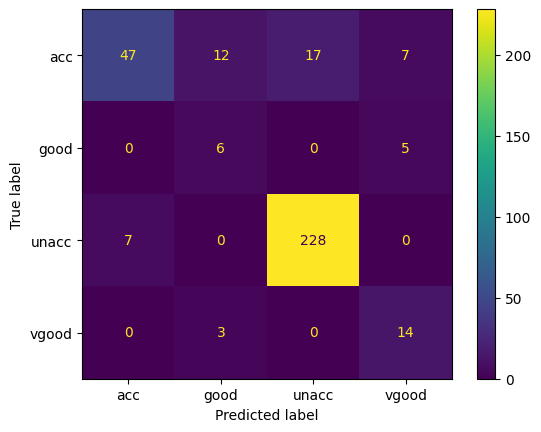

In [332]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_).plot()

Classification Report

In [333]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=rfc.classes_))

              precision    recall  f1-score   support

         acc       0.87      0.57      0.69        83
        good       0.29      0.55      0.38        11
       unacc       0.93      0.97      0.95       235
       vgood       0.54      0.82      0.65        17

    accuracy                           0.85       346
   macro avg       0.66      0.73      0.67       346
weighted avg       0.88      0.85      0.85       346

